## Esse aluguel está caro? 
### Um projeto de webscraping e Machine Learning

Quem tem apartamento alugado ja sabe: deu um ano? o preço aumenta. A grande maioria dos contratos de alguel tem como claussula de reajuste para 1 ano depois de morar no imovel, ajustado de acordo com o IGP-M acumulado de um ano. Só que, diferente dos ultimos 20 anos, o IGP-M está muito alto hoje em dia (2021), o que esta causando um aumento absurdo nos valores de aluguel dos Millenials por aí.


GRAFICO DO IGPM

O mesmo aconteceu aqui em casa. Fez um ano agora em Julho que eu me mudei para morar com meu namorado, e o nosso aluguel (que era 800 reais) subiria bastante para os padrões desse apartamento (1040 reais num apartamento 2 quartos que nem interfone tem não dá ne). Felizmente a gente conseguiu conversar com o proprietario e estabelecemos um aumento justo (para 880 reais). Mas ainda assim eu fiquei com aquela duvida: Será que esse aumento é justo para os apartamentos da vizinhança.

E foi assim que surgiu esse projeto: para responder a pergunta "O meu aluguel está caro?" vamos usarr algumas bibliotecas de python, os meus conhecimentos quase nulos em HTML (o deficit do jovem que nunca teve um tumblr) e os anuncios do ZAP Imoveis, OLX e VivaReal num modelo de aprendizado de maquina.


Quem tem experiencia na cozinha, quando vai fazer alguma receita, sempre começa reunindo os ingredientes. O mesmo vale por aqui, vamos começar importanto os bibliotecas e estabelecendo algumas propriedades do servidor para o nosso webscrapping.

In [36]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
sns.set()

In [2]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

### Testes


Vamos agora explorar a estrutura das plataformas que vamos usar para depois automatizar a raspagem dos dados. Precisamso saber onde cada dado dos anuncios está no código fonte do site e como essas 'localizações' podem variar no texto. O primeiro  a ser testado é o do ZAP imoveis




#### ZAP imoveis


O que eu fiz aqui foi extrair o codigo fonte de uma pagina do ZAP imoveis. Mais especificamente dessa pagina [aqui][zap]. Nessa pagina tem imoveis do meu bairro e bairros vizinhos, que é exatamente o conjunto de dados que eu quero para esse projeto.



[zap]: https://www.zapimoveis.com.br/aluguel/apartamentos/mg+belo-horizonte++liberdade/?pagina=2&onde=,Minas%20Gerais,Belo%20Horizonte,,Liberdade,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ELiberdade,-19.865305,-43.952023%3B,Minas%20Gerais,Belo%20Horizonte,,Ouro%20Preto,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EOuro%20Preto,-19.874898,-43.992275%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Francisco,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Francisco,-19.877506,-43.956058%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Lu%C3%ADz,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Luiz,-19.857363,-43.967109%3B,Minas%20Gerais,Belo%20Horizonte,,Jaragu%C3%A1,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EJaragua,-19.858255,-43.952023&transacao=Aluguel&tipo=Im%C3%B3vel%20usado&tipoUnidade=Residencial,Apartamento


In [3]:
zap="https://www.zapimoveis.com.br/aluguel/apartamentos/mg+belo-horizonte++liberdade/?pagina=2&onde=,Minas%20Gerais,Belo%20Horizonte,,Liberdade,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ELiberdade,-19.865305,-43.952023%3B,Minas%20Gerais,Belo%20Horizonte,,Ouro%20Preto,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EOuro%20Preto,-19.874898,-43.992275%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Francisco,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Francisco,-19.877506,-43.956058%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Lu%C3%ADz,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Luiz,-19.857363,-43.967109%3B,Minas%20Gerais,Belo%20Horizonte,,Jaragu%C3%A1,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EJaragua,-19.858255,-43.952023&transacao=Aluguel&tipo=Im%C3%B3vel%20usado&tipoUnidade=Residencial,Apartamento"
response = get(zap, headers=headers)

In [4]:
print(response) #dizem que response [200] é o sinal de que está funcionando.

<Response [200]>


In [5]:
html_soup = BeautifulSoup(response.text, 'html.parser')

Aqui fizemos alguns protocolos para raspagem de dados em HTML, eu não entendo muito dessas coisas então nõ voi me aprofundar aqui, o importante é que funciona. Você pode encontrar mais informações para esse texto [aqui][webscraping].


[webscraping]:https://medium.com/@fneves/looking-for-a-house-build-a-web-scraper-to-help-you-5ab25badc83e

In [6]:
zap = "https://www.zapimoveis.com.br/aluguel/apartamentos/mg+belo-horizonte++liberdade/?onde=,Minas%20Gerais,Belo%20Horizonte,,Liberdade,,,neighborhood,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ELiberdade,-19.865305,-43.952023%3B,Minas%20Gerais,Belo%20Horizonte,,Ouro%20Preto,,,neighborhood,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EOuro%20Preto,-19.874898,-43.992275%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Francisco,,,neighborhood,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Francisco,-19.877506,-43.956058%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Lu%C3%ADz,,,neighborhood,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Luiz,-19.857363,-43.967109%3B,Minas%20Gerais,Belo%20Horizonte,,Jaragu%C3%A1,,,neighborhood,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EJaragua,-19.858255,-43.952023&transacao=Aluguel&tipoUnidade=Residencial,Apartamento&tipo=Im%C3%B3vel%20usado&pagina=1"
response = get(zap, headers=headers)
html_soup = BeautifulSoup(response.text, 'html.parser')

house_containers_zap = html_soup.find_all('div', class_="simple-card__box")
first_zap = house_containers_zap[0]
test_zap = first_zap.find_all(['span', 'p'])[15].text
test_zap = re.sub("[^0-9]", "", test_zap)
test_zap
#first.find_all('p')

# 0 - aluguel
# 4 - condominio
# 5 - iptu (se tiver)

# se tiver o iptu:
# 6 - descriçao 
# 7 - endereço
# 9 - area
# 11 - quartos
# 13 - vagas de garagem
# 15 - banheiros

#se nao tiver o iptu
# 5 - descriçao 
# 6 - endereço
# 8 - area
# 10 - quartos
# 12 - vagas de garagem
# 14 - banheiros

'3'

A primeira tentativa de extração dos dados da ZAP moveis eu estava fazendo com base na posiçao de cada elemento no texto, sendo que esse método, embora mais facil para os inciantes, é mais complexo e menos eficiente dado que as coisas podem mudar de posição a depender do conteúdo do anuncio.  Por isso, mais tarde ao analisar os conteudos do viva real eu refiz a função de extração de dados do Zap imoveis e ficou bem mais eficiente. 

### Testando na olx

In [7]:
olx="https://mg.olx.com.br/belo-horizonte-e-regiao/pampulha/imoveis/aluguel/apartamentos?pe=1300&ps=600&roe=2&ros=1"
response = get(olx, headers=headers)
html_soup = BeautifulSoup(response.text, 'html.parser')

house_containers_olx = html_soup.find_all('a', class_="fnmrjs-0 fyjObc")

test_olx=house_containers_olx[10].find_all(['span', 'p'])
#first_quinto = house_containers_quinto[0]

In [8]:
print("especificacoes=",test_olx[1].text)
print("aluguel=",test_olx[2].text)
print("localizaçao=",test_olx[5].text)

especificacoes= 2 quartos | 55m² | 1 vaga
aluguel= R$ 650
localizaçao= Belo Horizonte, Santa Mônica


### Testando na vivareal

In [9]:
vivareal="https://www.vivareal.com.br/aluguel/minas-gerais/belo-horizonte/bairros/liberdade/apartamento_residencial/#onde=BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Liberdade,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Ouro_Preto,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Sao_Luiz,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Sao_Jose,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Sao_Francisco,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Jaragua,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Bandeirantes"
response = get(vivareal, headers=headers)
html_soup = BeautifulSoup(response.text, 'html.parser')

house_containers_vivareal = html_soup.find_all('div', class_="js-card-selector")

test_vivareal=house_containers_vivareal[10].find_all(['span', 'p'])
#first_quinto = house_containers_quinto[0]
test_vivareal

[<span class="see-more__count">+ 21 fotos</span>,
 <span class="property-card__title js-cardLink js-card-title">  Apartamento com 4 Quartos para Aluguel, 170m²  </span>,
 <span class="property-card__address-container js-property-card-address js-see-on-map"> <span class="property-card__address">Rua Aureliano Lessa - Liberdade, Belo Horizonte - MG</span> <span class="property-card__map-link"> ver mapa </span> </span>,
 <span class="property-card__address">Rua Aureliano Lessa - Liberdade, Belo Horizonte - MG</span>,
 <span class="property-card__map-link"> ver mapa </span>,
 <span class="property-card__detail-value js-property-card-value property-card__detail-area js-property-card-detail-area"> 170 </span>,
 <span class="property-card__detail-text js-property-card-detail-text"> m² </span>,
 <span class="property-card__detail-value js-property-card-value"> 4 </span>,
 <span class="property-card__detail-text js-property-card-detail-text"> Quartos </span>,
 <span class="property-card__detail-

In [10]:
print("quartos=",test_vivareal[7].text)
print("area=",test_vivareal[5].text)
print("banheiros=",test_vivareal[9].text)
print("garagens=",test_vivareal[11].text)
print("aluguel=",test_vivareal[13].text)
print("localizaçao=",test_vivareal[3].text)


quartos=  4 
area=  170 
banheiros=  3 
garagens=  3 
aluguel=   R$ 3.400 /Mês 
localizaçao= Rua Aureliano Lessa - Liberdade, Belo Horizonte - MG


 ### Extraindo dados da Zap imoveis

In [11]:
def return_patterned_housings(aluguel, localizacao, quartos, condominio, iptu,
                              area, banheiros, garagens, host):
    return [
        aluguel, localizacao, quartos, condominio, iptu, area, banheiros,
        garagens, host
    ]

In [12]:
def old_get_zap(anuncio):

    anuncio_data = anuncio.find_all(['span', 'p', 'li'])

    anuncio_data_aluguel = re.sub("[^0-9]", "", anuncio_data[0].text)

    anuncio_data_condominio = re.sub("[^0-9]", "", anuncio_data[5].text)
    if anuncio_data[7].has_attr('class'):
        if anuncio_data[7]['class'][0] == 'card-price__value':
            i = 2
            anuncio_data_iptu = re.sub("[^0-9]", "", anuncio_data[7].text)
        else:
            i = 0
            anuncio_data_iptu = 0
    else:
        i = 3
        anuncio_data_iptu = 0

    anuncio_data_descricao = re.sub("[^0-9]", "", anuncio_data[6 + i].text)

    anuncio_data_localizacao = re.sub(r'[^\w]', " ", anuncio_data[7 + i].text)

    anuncio_data_area = re.sub("[^0-9]", "", anuncio_data[8 + i].text)

    
    scale=13
    
    if anuncio_data[scale + i]['itemprop'] == "numberOfRooms":
        anuncio_data_quartos = re.sub("[^0-9]", "", anuncio_data[scale + i].text)
        i += 3
    else:
        anuncio_data_quartos = 1
    if anuncio_data[scale -2+ i].has_attr('class'):
         if anuncio_data[scale -2+ i]['class'][2] == 'js-parking-spaces':
            anuncio_data_garagem = re.sub("[^0-9]", "", anuncio_data[scale + i].text)
            i += 3
         else:
            anuncio_data_garagem = 0
            i+=2
    else:
        anuncio_data_garagem = 0
        i+=2
    if anuncio_data[scale -2+ i].has_attr('class'):
        if anuncio_data[scale -2+ i]['class'][2] == 'js-bathrooms':
            anuncio_data_banheiros = re.sub("[^0-9]", "",
                                            anuncio_data[scale + i].text)
            i += 2
        else:
            anuncio_data_banheiros = 1

    else:
        anuncio_data_banheiros = 1

    return return_patterned_housings(aluguel=float(anuncio_data_aluguel),
                                     localizacao=anuncio_data_localizacao,
                                     quartos=int(anuncio_data_quartos),
                                     condominio=float(anuncio_data_condominio),
                                     iptu=float(anuncio_data_iptu),
                                     area=float(anuncio_data_area),
                                     banheiros=int(anuncio_data_banheiros),
                                     garagens=int(anuncio_data_garagem),
                                    host='zap')


def get_zap(anuncio):
    anuncio_data= anuncio.find_all([ 'p', 'span', 'li'])
    anuncio_data_aluguel = get_card_values(anuncio_data, 'class',
                                        "js-price")
    anuncio_data_localizacao = get_card_values(anuncio_data,
                    'class',
                    "simple-card__address",
                    regex=r'[^\w]',
                    regex_div=' ')  
    anuncio_data_quartos = get_card_values(anuncio_data, 'class',
                                           "js-bedrooms")
    anuncio_data_area = get_card_values(anuncio_data, 'class',
                                        "js-areas")
    anuncio_data_banheiros = get_card_values(anuncio_data, 'class',
                                             "js-bathrooms")
    anuncio_data_garagem = get_card_values(anuncio_data, 'class',
                                           "js-parking-spaces")
    anuncio_data_condominio = get_card_values(anuncio_data, 'class',
                                        "condominium")
    
    anuncio_data_iptu = get_card_values(anuncio_data, 'class', 'iptu')
    
    return return_patterned_housings(aluguel=float(anuncio_data_aluguel),
                                     localizacao=anuncio_data_localizacao,
                                     quartos=int(anuncio_data_quartos),
                                     condominio=float(anuncio_data_condominio),
                                     iptu=float(50),
                                     area=float(anuncio_data_area),
                                     banheiros=int(anuncio_data_banheiros),
                                     garagens=int(anuncio_data_garagem),
                                    host='zap')


In [13]:
for anuncio in house_containers_zap:
    print(old_get_zap(anuncio))

[1300.0, '           Jaraguá  Belo Horizonte         ', 3, 340.0, 85.0, 88.0, 3, 2, 'zap']
[2350.0, '           Liberdade  Belo Horizonte         ', 3, 550.0, 170.0, 80.0, 2, 2, 'zap']
[1900.0, '           Ouro Preto  Belo Horizonte         ', 3, 400.0, 138.0, 90.0, 1, 2, 'zap']
[1750.0, '           Rua Aureliano Lessa  Liberdade         ', 3, 393.0, 139.0, 80.0, 2, 2, 'zap']
[1750.0, '           Liberdade  Belo Horizonte         ', 2, 310.0, 73.0, 65.0, 1, 1, 'zap']
[1700.0, '           Ouro Preto  Belo Horizonte         ', 2, 400.0, 102.0, 60.0, 1, 1, 'zap']
[1800.0, '           Rua Beira Alta  São Francisco         ', 2, 360.0, 111.0, 80.0, 2, 2, 'zap']
[1200.0, '           Rua José Ribeiro Filho  Ouro Preto         ', 2, 210.0, 70.0, 45.0, 1, 1, 'zap']
[1500.0, '           Rua Beira Alta  São Francisco         ', 3, 450.0, 104.0, 75.0, 2, 2, 'zap']
[2800.0, '           Rua Escravo Alexandre  Liberdade         ', 2, 579.0, 175.0, 64.0, 2, 2, 'zap']
[2400.0, '           Liberdade  Be

In [14]:
house_containers_zap[3].find_all(['span', 'p', 'li'])[7].has_attr('class')

True

In [15]:
def get_olx(anuncio):
    anuncio_data = anuncio.find_all(['span', 'p'])
    anuncio_data_aluguel = re.sub("[^0-9]", "", anuncio_data[2].text)
    anuncio_data_localizacao = re.sub(r'[^\w]', " ", anuncio_data[5].text)

    if anuncio_data_localizacao.find('Belo') == -1:
        return

    if anuncio_data[1].text.find('quarto') > -1:
        if re.sub(
                "[^0-9]", "",
                anuncio_data[1].text[anuncio_data[1].text.find('quarto') -
                                     2]) == '':
            anuncio_data_quartos = 1
        else:
            anuncio_data_quartos = int(
                re.sub(
                    "[^0-9]", "",
                    anuncio_data[1].text[anuncio_data[1].text.find('quarto') -
                                         2]))
            
    else:
        anuncio_data_quartos = 1

    if anuncio_data[1].text.find('Condomínio') > -1:
        anuncio_data_condominio = re.sub(
            "[^0-9]", "",
            anuncio_data[1].text[anuncio_data[1].text.find('Condomínio') +
                                 12:anuncio_data[1].text.find('Condomínio') +
                                 18])
    else:
        anuncio_data_condominio = 0

    if anuncio_data[1].text.find('vaga') > -1:
        anuncio_data_garagem = re.sub(
            "[^0-9]", "",
            anuncio_data[1].text[anuncio_data[1].text.find('vaga') - 2])
        if anuncio_data_garagem == '':
            anuncio_data_garagem = 0
    else:
        anuncio_data_garagem = 1

    if anuncio_data[1].text.find('m²') > -1:
        anuncio_data_area = re.sub(
            "[^0-9]", "",
            anuncio_data[1].text[anuncio_data[1].text.find('m²') -
                                 3:anuncio_data[1].text.find('m²')])
        if anuncio_data_area == '':
            anuncio_data_area = 10
    else:
        anuncio_data_area = 30

    if anuncio_data_quartos == 1:
        anuncio_data_banheiros = 1
    else:
        anuncio_data_banheiros = anuncio_data_quartos - 1

    return return_patterned_housings(aluguel=float(anuncio_data_aluguel),
                                     localizacao=anuncio_data_localizacao,
                                     quartos=int(anuncio_data_quartos),
                                     condominio=float(anuncio_data_condominio),
                                     iptu=float(50),
                                     area=float(anuncio_data_area),
                                     banheiros=int(anuncio_data_banheiros),
                                     garagens=int(anuncio_data_garagem),
                                     host='olx')

In [16]:
for anuncio in house_containers_olx:
    print(get_olx(anuncio))



[770.0, 'Belo Horizonte  Céu Azul', 1, 0.0, 50.0, 40.0, 1, 1, 'olx']
[900.0, 'Belo Horizonte  Santa Branca', 2, 185.0, 50.0, 53.0, 1, 1, 'olx']
[750.0, 'Belo Horizonte  Céu Azul', 2, 0.0, 50.0, 0.0, 1, 1, 'olx']
None
[800.0, 'Belo Horizonte  Bandeirantes  Pampulha ', 2, 215.0, 50.0, 45.0, 1, 1, 'olx']
None
[850.0, 'Belo Horizonte  Ouro Preto', 2, 200.0, 50.0, 50.0, 1, 1, 'olx']
[1000.0, 'Belo Horizonte  Ouro Preto', 2, 200.0, 50.0, 60.0, 1, 1, 'olx']
[850.0, 'Belo Horizonte  Santa Terezinha', 2, 150.0, 50.0, 47.0, 1, 1, 'olx']
[1100.0, 'Belo Horizonte  Santa Amélia', 2, 235.0, 50.0, 60.0, 1, 2, 'olx']
[650.0, 'Belo Horizonte  Santa Mônica', 2, 0.0, 50.0, 55.0, 1, 1, 'olx']
None
None
[950.0, 'Belo Horizonte  Santa Amélia', 2, 230.0, 50.0, 60.0, 1, 1, 'olx']
None
[1300.0, 'Belo Horizonte  Céu Azul', 2, 0.0, 50.0, 100.0, 1, 1, 'olx']
[1000.0, 'Belo Horizonte  Santa Amélia', 2, 300.0, 50.0, 49.0, 1, 1, 'olx']
None
[990.0, 'Belo Horizonte  Castelo', 2, 250.0, 50.0, 0.0, 1, 1, 'olx']
[600.0,

In [17]:
def get_card_values(text, attr, attr_name, regex="[^0-9]", regex_div=''):
    for line in text:
        if line.has_attr(attr):
            if any(word in [attr_name] for word in line[attr]):
                ret= re.sub(regex, regex_div, line.text)
                if ret =='':
                    return 0 
                else:
                    return ret            
    return 0


def get_vivareal(anuncio):
    anuncio_data= anuncio.find_all(['div', 'p', 'span', 'li'])
    anuncio_data_aluguel = get_card_values(anuncio_data, 'class',
                                        "property-card__price")
    anuncio_data_localizacao = get_card_values(anuncio_data,
                    'class',
                    "property-card__address",
                    regex=r'[^\w]',
                    regex_div=' ')  
    anuncio_data_quartos = get_card_values(anuncio_data, 'class',
                                           "js-property-detail-rooms")
    anuncio_data_area = get_card_values(anuncio_data, 'class',
                                        "js-property-card-detail-area")
    anuncio_data_banheiros = get_card_values(anuncio_data, 'class',
                                             "js-property-detail-bathroom")
    anuncio_data_garagem = get_card_values(anuncio_data, 'class',
                                           "js-property-detail-garages")
    anuncio_data_condominio = get_card_values(anuncio_data, 'class',
                                        "property-card__price-details--condo")
    
    
    
    return return_patterned_housings(aluguel=float(anuncio_data_aluguel),
                                     localizacao=anuncio_data_localizacao,
                                     quartos=int(anuncio_data_quartos),
                                     condominio=float(anuncio_data_condominio),
                                     iptu=float(50),
                                     area=float(anuncio_data_area),
                                     banheiros=int(anuncio_data_banheiros),
                                     garagens=int(anuncio_data_garagem),
                                    host='vivareal')

In [18]:
for anuncio in house_containers_vivareal:
    print(get_vivareal(anuncio))

[1500.0, 'Liberdade  Belo Horizonte   MG', 3, 250.0, 50.0, 119.0, 3, 1, 'vivareal']
[1500.0, 'Rua Flor de fogo  65   Liberdade  Belo Horizonte   MG', 3, 453.0, 50.0, 70.0, 2, 1, 'vivareal']
[1600.0, 'Rua Flor de fogo  0   Liberdade  Belo Horizonte   MG', 3, 338.0, 50.0, 80.0, 1, 1, 'vivareal']
[2800.0, 'Rua Escravo Alexandre  105   Liberdade  Belo Horizonte   MG', 2, 579.0, 50.0, 64.0, 2, 2, 'vivareal']
[1400.0, 'Liberdade  Belo Horizonte   MG', 3, 360.0, 50.0, 75.0, 1, 1, 'vivareal']
[1200.0, 'Rua Boaventura  771   Liberdade  Belo Horizonte   MG', 2, 400.0, 50.0, 76.0, 2, 1, 'vivareal']
[1050.0, 'Liberdade  Belo Horizonte   MG', 3, 400.0, 50.0, 77.0, 2, 1, 'vivareal']
[1000.0, 'Rua Balsamar  563   Liberdade  Belo Horizonte   MG', 3, 280.0, 50.0, 57.0, 1, 1, 'vivareal']
[1400280000.0, 'Rua João Fernandes   Liberdade  Belo Horizonte   MG', 3, 280.0, 50.0, 75.0, 1, 1, 'vivareal']
[1600.0, 'Liberdade  Belo Horizonte   MG', 3, 480.0, 50.0, 90.0, 2, 1, 'vivareal']
[3400.0, 'Rua Aureliano Le

### Extraindo dados

In [19]:
def get_page_zap(page_url):
    response = get(page_url, headers=headers)
    html_soup = BeautifulSoup(response.text, 'html.parser')

    house_containers = html_soup.find_all('div', class_="simple-card__box")
    ret = []
    for anuncio in house_containers:
        ret.append(get_zap(anuncio))
    return ret


def get_page_olx(page_url):
    response = get(page_url, headers=headers)
    html_soup = BeautifulSoup(response.text, 'html.parser')

    house_containers =  html_soup.find_all('a', class_="fnmrjs-0 fyjObc")
    ret = []
    for anuncio in house_containers:
        ret.append(get_olx(anuncio))
    return ret


def get_page_vivareal(page_url):
    response = get(page_url, headers=headers)
    html_soup = BeautifulSoup(response.text, 'html.parser')

    house_containers = html_soup.find_all('div', class_="js-card-selector")
    ret = []
    for anuncio in house_containers:
        ret.append(get_vivareal(anuncio))
    return ret


In [20]:
url_zap_1="https://www.zapimoveis.com.br/aluguel/apartamentos/mg+belo-horizonte++liberdade/?onde=,Minas%20Gerais,Belo%20Horizonte,,Liberdade,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ELiberdade,-19.865305,-43.952023%3B,Minas%20Gerais,Belo%20Horizonte,,Ouro%20Preto,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EOuro%20Preto,-19.874898,-43.992275%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Francisco,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Francisco,-19.877506,-43.956058%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Lu%C3%ADz,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Luiz,-19.857363,-43.967109%3B,Minas%20Gerais,Belo%20Horizonte,,Jaragu%C3%A1,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EJaragua,-19.858255,-43.952023&pagina="
url_zap_2="&tipo=Im%C3%B3vel%20usado&tipoUnidade=Residencial,Apartamento&transacao=Aluguel"


url_zap_pages= [url_zap_1 + str(x) + url_zap_2 for x in list(range(1,11))]
url_zap_pages

zap_data=[]

for url in url_zap_pages:
    zap_data+=get_page_zap(url)

In [21]:
url_olx_1="https://mg.olx.com.br/belo-horizonte-e-regiao/pampulha/imoveis/aluguel/apartamentos?o="
url_olx_2="&pe=8000&ps=100&roe=5&ros=0"

url_olx_pages= [url_olx_1 + str(x) + url_olx_2 for x in list(range(1,11))]
url_olx_pages

olx_data=[]

for url in url_olx_pages:
    olx_data+=get_page_olx(url)

In [22]:
olx_data

[[1350.0, 'Belo Horizonte  Ouro Preto', 2, 300.0, 50.0, 90.0, 1, 2, 'olx'],
 [1350.0, 'Belo Horizonte  Ouro Preto', 2, 90.0, 50.0, 90.0, 1, 2, 'olx'],
 [2100.0, 'Belo Horizonte  Ouro Preto', 3, 300.0, 50.0, 140.0, 2, 2, 'olx'],
 [1500.0, 'Belo Horizonte  Ouro Preto', 3, 300.0, 50.0, 95.0, 2, 2, 'olx'],
 [3900.0, 'Belo Horizonte  Paquetá', 3, 260.0, 50.0, 162.0, 2, 2, 'olx'],
 [1700.0, 'Belo Horizonte  Santa Amélia', 3, 317.0, 50.0, 110.0, 2, 2, 'olx'],
 [1300.0, 'Belo Horizonte  Itapoã', 3, 150.0, 50.0, 360.0, 2, 1, 'olx'],
 [1700.0, 'Belo Horizonte  Castelo', 3, 350.0, 50.0, 110.0, 2, 1, 'olx'],
 [2500.0, 'Belo Horizonte  Castelo', 3, 300.0, 50.0, 87.0, 2, 2, 'olx'],
 [770.0, 'Belo Horizonte  Céu Azul', 1, 0.0, 50.0, 40.0, 1, 1, 'olx'],
 [1500.0, 'Belo Horizonte  Santa Mônica', 2, 150.0, 50.0, 116.0, 1, 1, 'olx'],
 [900.0, 'Belo Horizonte  Santa Branca', 2, 185.0, 50.0, 53.0, 1, 1, 'olx'],
 [3300.0, 'Belo Horizonte  Paquetá', 4, 200.0, 50.0, 220.0, 3, 1, 'olx'],
 [750.0, 'Belo Horizon

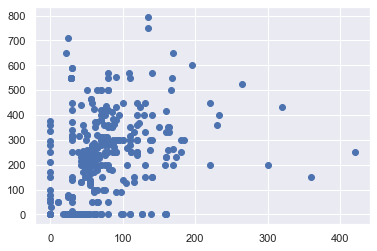

In [23]:
alugueis=[a[0] for a in filter(None, olx_data)]
condominio=[a[3] for a in filter(None, olx_data)]
area=[a[5] for a in filter(None, olx_data)]
plt.plot(area, condominio,'o')

In [24]:
url_vivareal_1 = "https://www.vivareal.com.br/aluguel/minas-gerais/belo-horizonte/bairros/" 
url_vivareal_2 = "/apartamento_residencial/"


bairros=["liberdade", "ouro-preto", "sao-francisco", "sao-luiz", "jaragua", "bandeirantes"]
url_vivareal_pages = [url_vivareal_1 + str(x) + url_vivareal_2 for x in bairros]
url_vivareal_pages

vivareal_data = []

for url in url_vivareal_pages:
    vivareal_data += get_page_vivareal(url)

In [25]:
vivareal_data

[[1500.0,
  'Liberdade  Belo Horizonte   MG',
  3,
  250.0,
  50.0,
  119.0,
  3,
  1,
  'vivareal'],
 [1500.0,
  'Rua Flor de fogo  65   Liberdade  Belo Horizonte   MG',
  3,
  453.0,
  50.0,
  70.0,
  2,
  1,
  'vivareal'],
 [1600.0,
  'Rua Flor de fogo  0   Liberdade  Belo Horizonte   MG',
  3,
  338.0,
  50.0,
  80.0,
  1,
  1,
  'vivareal'],
 [2800.0,
  'Rua Escravo Alexandre  105   Liberdade  Belo Horizonte   MG',
  2,
  579.0,
  50.0,
  64.0,
  2,
  2,
  'vivareal'],
 [1400.0,
  'Liberdade  Belo Horizonte   MG',
  3,
  360.0,
  50.0,
  75.0,
  1,
  1,
  'vivareal'],
 [1200.0,
  'Rua Boaventura  771   Liberdade  Belo Horizonte   MG',
  2,
  400.0,
  50.0,
  76.0,
  2,
  1,
  'vivareal'],
 [1050.0,
  'Liberdade  Belo Horizonte   MG',
  3,
  400.0,
  50.0,
  77.0,
  2,
  1,
  'vivareal'],
 [1000.0,
  'Rua Balsamar  563   Liberdade  Belo Horizonte   MG',
  3,
  280.0,
  50.0,
  57.0,
  1,
  1,
  'vivareal'],
 [1400280000.0,
  'Rua João Fernandes   Liberdade  Belo Horizonte   MG',
  

### Explorando e tratando os dados


In [26]:
total_data= [*zap_data , *vivareal_data , *list(filter(None, olx_data))]

In [27]:
alugueis=[a[0] for a in total_data]
condominio=[a[3] for a in total_data]
area=[a[5] for a in total_data]

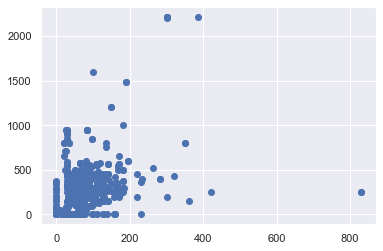

In [28]:
plt.plot(area, condominio, 'o')

In [29]:
df=pd.DataFrame(total_data, columns= [
                      "aluguel", "localizacao", "quartos", "condominio", "iptu", "area",
                      "banheiros", "garagens", 'host'
                  ])

In [30]:
df['total']= df.aluguel+df.condominio+df.iptu

<AxesSubplot:xlabel='quartos', ylabel='total'>

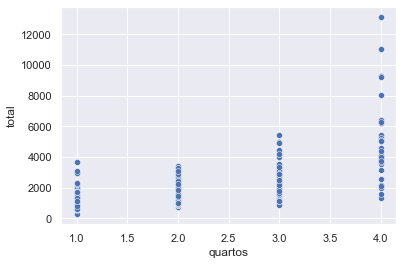

In [31]:
sns.scatterplot(data=df[df.aluguel<1000000],x='quartos', y='total' )

<AxesSubplot:xlabel='total', ylabel='Count'>

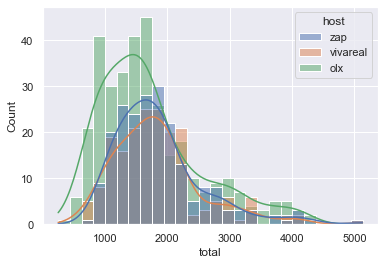

In [32]:
sns.color_palette("crest", as_cmap=True)
sns.histplot(data=df[df.aluguel<4000],x='total', kde=True, hue='host')

In [33]:
def find_duplicates(dataset):
    ret = np.zeros(len(dataset))
    for i in range(len(dataset)):
        anuncio_i = dataset.iloc[i]
        for j in range(i+1, len(dataset)):
            anuncio_j = dataset.iloc[j]
            if anuncio_i.aluguel == anuncio_j.aluguel and anuncio_i.host != anuncio_j.host and anuncio_i.area== anuncio_j.area:
                ret[j]=1
    return pd.Series(ret)
            

In [37]:
filtro  = find_duplicates(df)

In [38]:
df_clean =df[filtro == 0]

In [39]:
df_clean= df_clean[df_clean.aluguel<10000]

<AxesSubplot:xlabel='total', ylabel='Count'>

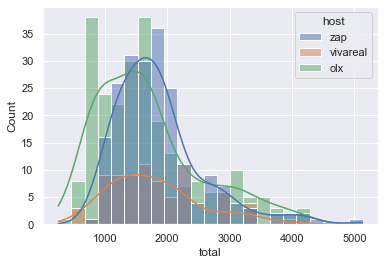

In [40]:
sns.histplot(data=df_clean[df_clean.aluguel<4000],x='total', kde=True, hue='host')